# Анализ датасета о продуктах

Ход работы:
1. Импортируйте библиотеки, которые были описаны на лекции
2. Импортируйте датасет foodmart.products.tsv, предварительно скачав его
3. Проведите анализ данных, используя лекционный файл 6 EDA в качестве примера.
 - Прим. *Для отображения используйте библиотеку seaborn или plotly!*
 - Отобразите 5 первых элементов таблицы и пять последних
 - Отобразите статистику по датасету, используя функции .info(), .describe()
 - Изучите таблицу на наличие дублей, удалите их, если обнаружите
 - Визуализируйте данные (обязательно scatterplot, hist, countplot, pairplot + что-нибудь интересное из библиотеки на ваш вкус)
 - Постройте матрицу корреляции признаков
 - Изучите пропуски, обработайте их удалением или заполнением (средним значением, модой и тд)
 - Поищите выбросы в данных. Их не удаляйте, добавьте новый столбец-маркер "Outlier" и отметьте в нем True для выбросов и False - в противоположном случае
 - Преобразуйте все данные к их истинным типам. Например, low_fat - к типу bool, подумайте, что нужно сделать. Числовые типы - соответственно к int или float
 - Приведите все столбцы строкового типа к нижнему регистру
 - brand_name дублируется в product_name, очистите product_name от дублирования

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns                     
import matplotlib.pyplot as plt 
from scipy import stats
sns.set_theme(style="whitegrid")

In [66]:
df = pd.read_csv("foodmart.products.csv")
df.head(5)

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20


In [67]:
df.tail(5)

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
1555,53,1556,CDR,CDR Creamy Peanut Butter,29538288712,2.65,6.94,3.94,True,True,7,9,11.10,3.98,17.5
1556,33,1557,CDR,CDR Strawberry Preserves,50687324404,1.20,15.40,13.30,True,False,15,6,14.10,14.80,19.3
1557,53,1558,CDR,CDR Extra Chunky Peanut Butter,84930775761,2.16,11.50,9.50,False,True,22,10,7.35,9.29,12.4
1558,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.30,20.20,18.8
1559,31,1560,CDR,CDR Grape Jelly,54896665215,1.60,12.50,10.50,False,True,1,9,5.44,3.24,18.3


In [68]:
sum(df.duplicated())

0

Дубликатов нет

In [69]:
print(df.isnull().sum())

product_class_id      0
product_id            0
brand_name            0
product_name          0
SKU                   0
SRP                   0
gross_weight          0
net_weight            0
recyclable_package    0
low_fat               0
units_per_case        0
cases_per_pallet      0
shelf_width           0
shelf_height          0
shelf_depth           0
dtype: int64


Пропусков нет

In [70]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3)

df['outlier'] = outliers.any(axis=1)

In [71]:
df.describe()

,product_class_id,product_id,SKU,SRP,gross_weight,net_weight,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
count,1560.000000,1560.000000,1.560000e+03,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,54.403205,780.500000,5.562930e+10,2.117282,13.804821,11.791308,18.908333,9.475641,12.900692,12.915103,12.933750
std,30.872364,450.477524,2.580380e+10,0.932779,4.631014,4.693747,10.254237,2.638963,5.763655,5.844180,5.603036
min,1.000000,1.000000,1.003103e+10,0.500000,6.000000,3.050000,1.000000,5.000000,3.010000,3.000000,3.000000
25%,30.000000,390.750000,3.345056e+10,1.417500,9.657500,7.705000,10.000000,7.000000,7.860000,7.867500,8.300000
50%,57.500000,780.500000,5.629308e+10,2.130000,13.600000,11.600000,19.000000,9.000000,12.900000,12.700000,12.850000
75%,79.000000,1170.250000,7.798317e+10,2.792500,17.725000,16.000000,28.000000,12.000000,17.625000,18.200000,17.600000
max,110.000000,1560.000000,9.998368e+10,3.980000,21.900000,20.800000,36.000000,14.000000,22.900000,22.900000,22.900000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_class_id    1560 non-null   int64  
 1   product_id          1560 non-null   int64  
 2   brand_name          1560 non-null   object 
 3   product_name        1560 non-null   object 
 4   SKU                 1560 non-null   int64  
 5   SRP                 1560 non-null   float64
 6   gross_weight        1560 non-null   float64
 7   net_weight          1560 non-null   float64
 8   recyclable_package  1560 non-null   bool   
 9   low_fat             1560 non-null   bool   
 10  units_per_case      1560 non-null   int64  
 11  cases_per_pallet    1560 non-null   int64  
 12  shelf_width         1560 non-null   float64
 13  shelf_height        1560 non-null   float64
 14  shelf_depth         1560 non-null   float64
 15  outlier             1560 non-null   bool   
dtypes: boo

Приведение типов не требуется

In [73]:
df["SKU"] = df["SKU"].astype(str)

In [74]:
df = df.map(lambda s: s.lower() if type(s) == str else s)

In [75]:
df['product_name'] = df.apply(lambda row: row['product_name'].replace(row['brand_name'], '').strip(), axis=1)

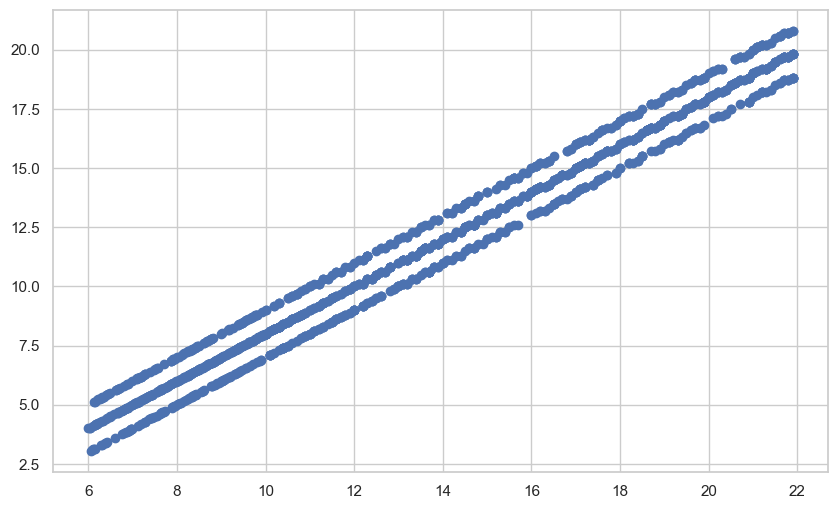

In [76]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["gross_weight"], df["net_weight"])

<Axes: xlabel='cases_per_pallet', ylabel='Count'>

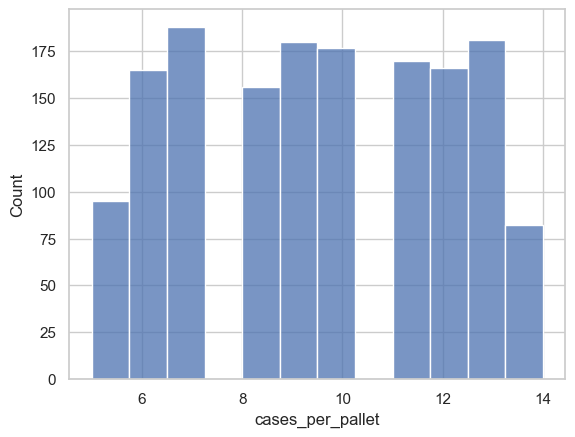

In [77]:
sns.histplot(df["cases_per_pallet"])

<Axes: xlabel='low_fat', ylabel='count'>

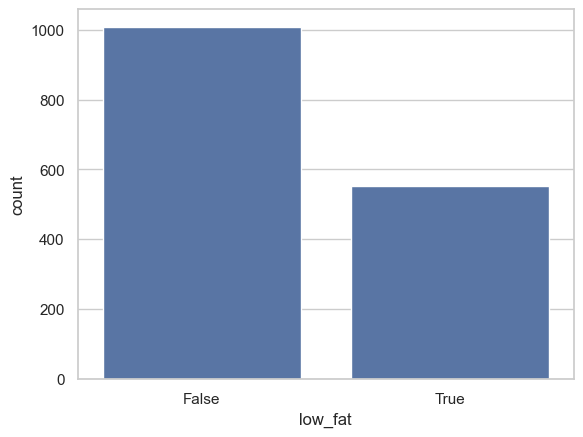

In [78]:
sns.countplot(df, x="low_fat")

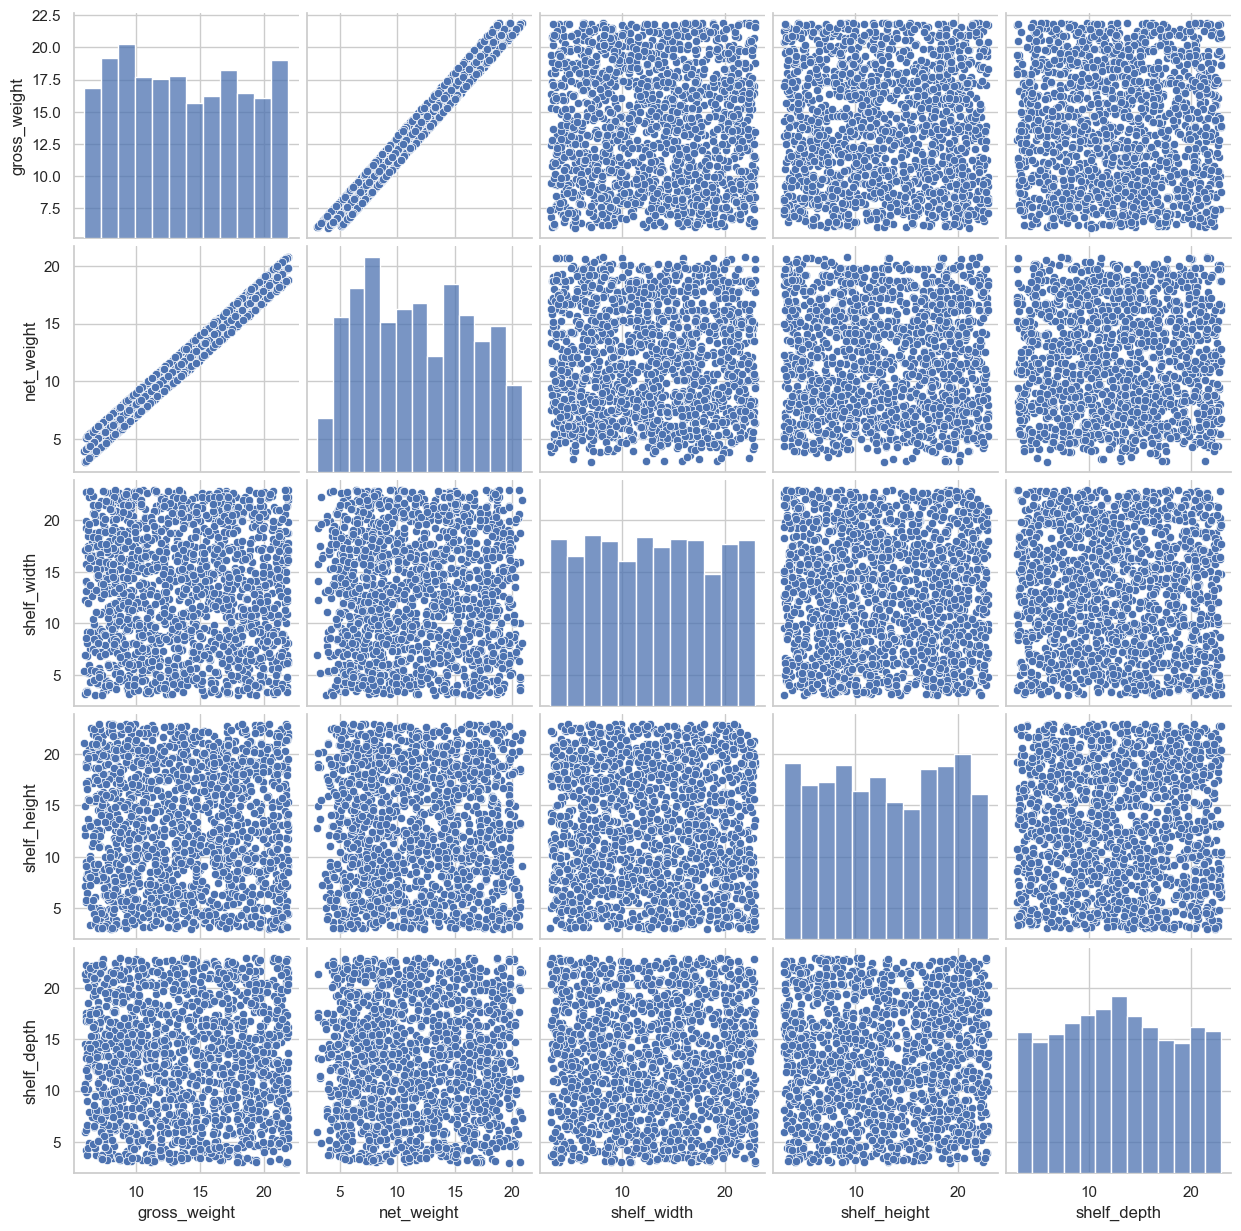

In [79]:
sns.pairplot(df, vars=["gross_weight","net_weight","shelf_width","shelf_height", "shelf_depth"])

In [84]:
df[["gross_weight", "net_weight", "units_per_case", "cases_per_pallet", "shelf_width", "shelf_height", "shelf_depth"]].corr()

,gross_weight,net_weight,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
gross_weight,1.000000,0.988900,-0.012808,-0.008488,-0.007510,-0.020649,-0.006808
net_weight,0.988900,1.000000,-0.015725,-0.011146,-0.007462,-0.019894,-0.003197
units_per_case,-0.012808,-0.015725,1.000000,-0.007324,0.006149,0.022755,0.034629
cases_per_pallet,-0.008488,-0.011146,-0.007324,1.000000,0.037001,-0.342805,0.025392
shelf_width,-0.007510,-0.007462,0.006149,0.037001,1.000000,0.005468,-0.023310
shelf_height,-0.020649,-0.019894,0.022755,-0.342805,0.005468,1.000000,0.003016
shelf_depth,-0.006808,-0.003197,0.034629,0.025392,-0.023310,0.003016,1.000000
